In [ ]:
#Problem Statement 1:
#A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply.
#Dataset Information:
#The walmart.csv contains 6435 rows and 8 columns.
#Feature Name-Description
#Store -Store number
#Date -Week of Sales
#Weekly_Sales -Sales for the given store in that week
#Holiday_Flag- If it is a holiday week
#Temperature- Temperature on the day of the sale
#Fuel_Price- Cost of the fuel in the region
#CPI -Consumer Price Index
#Unemployment- Unemployment Rate
#1. You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:
#a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?
#b. If the weekly sales show a seasonal trend, when and what could be the reason?
#c. Does temperature affect the weekly sales in any manner?
#d. How is the Consumer Price index affecting the weekly sales of various stores?
#e. Top performing stores according to the historical data.
#f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.
#2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

In [282]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind

In [126]:
sales= pd.read_csv('Walmart DataSet.csv')

In [127]:
sales

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [128]:
sales.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [129]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [130]:
sales['Date']=pd.to_datetime(sales["Date"], format="%d-%m-%Y")
sales.tail()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667

In [131]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [132]:
sales.duplicated().sum()

0

In [133]:
sales.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [134]:
sales.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [135]:
sales.describe().round()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price     CPI  \
count  6435.0        6435.0        6435.0       6435.0      6435.0  6435.0   
mean     23.0     1046965.0           0.0         61.0         3.0   172.0   
std      13.0      564367.0           0.0         18.0         0.0    39.0   
min       1.0      209986.0           0.0         -2.0         2.0   126.0   
25%      12.0      553350.0           0.0         47.0         3.0   132.0   
50%      23.0      960746.0           0.0         63.0         3.0   183.0   
75%      34.0     1420159.0           0.0         75.0         4.0   213.0   
max      45.0     3818686.0           1.0        100.0         4.0   227.0   

       Unemployment  
count        6435.0  
mean            8.0  
std             2.0  
min             4.0  
25%             7.0  
50%             8.0  
75%             9.0  
max            14.0

In [136]:
sales.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

C:\Users\dituj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

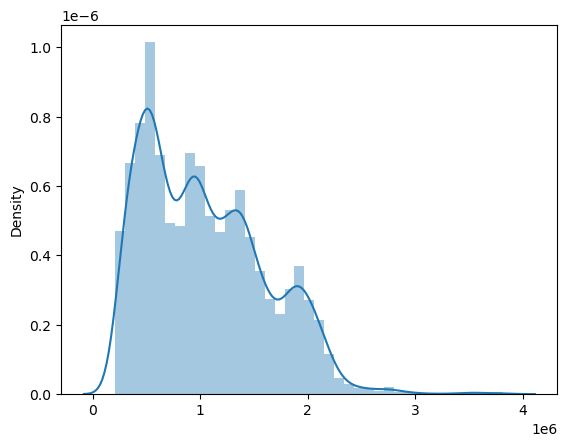

In [137]:
sns.distplot(x=sales['Weekly_Sales'])

C:\Users\dituj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dituj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dituj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:ylabel='Density'>

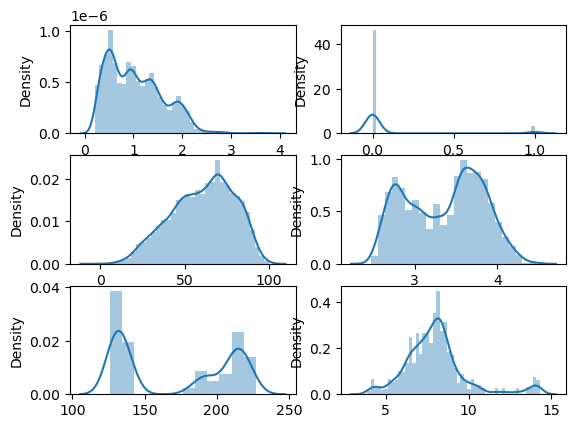

In [138]:
plt.subplot(3,2,1)
sns.distplot(x=sales['Weekly_Sales'])
plt.subplot(3,2,2)
sns.distplot(x=sales['Holiday_Flag'])
plt.subplot(3,2,3)
sns.distplot(x=sales['Temperature'])
plt.subplot(3,2,4)
sns.distplot(x=sales['Fuel_Price'])
plt.subplot(3,2,5)
sns.distplot(x=sales['CPI'])
plt.subplot(3,2,6)
sns.distplot(x=sales['Unemployment'])

In [139]:
(sales['Holiday_Flag']==1).sum()

450

<AxesSubplot:xlabel='Unemployment'>

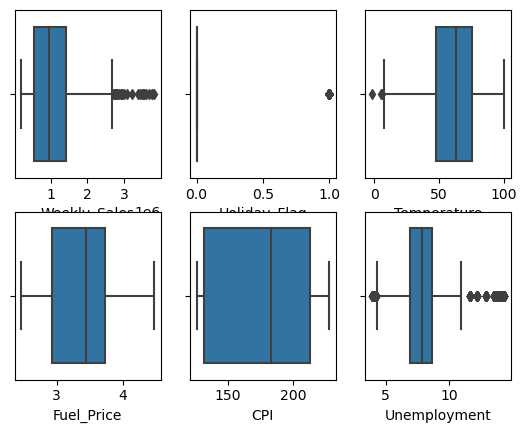

In [140]:
plt.subplot(2,3,1)
sns.boxplot(x=sales['Weekly_Sales'])
plt.subplot(2,3,2)
sns.boxplot(x=sales['Holiday_Flag'])
plt.subplot(2,3,3)
sns.boxplot(x=sales['Temperature'])
plt.subplot(2,3,4)
sns.boxplot(x=sales['Fuel_Price'])
plt.subplot(2,3,5)
sns.boxplot(x=sales['CPI'])
plt.subplot(2,3,6)
sns.boxplot(x=sales['Unemployment'])

<Figure size 1000x500 with 0 Axes>

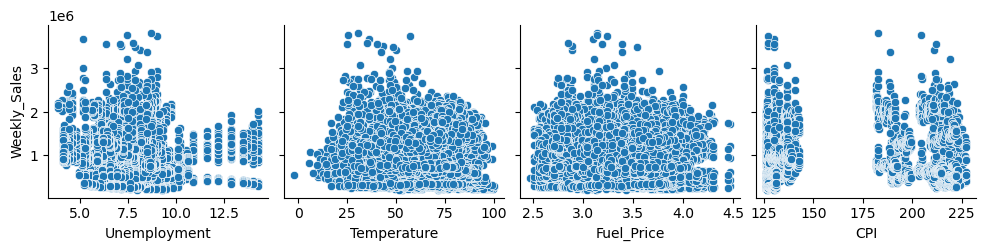

In [141]:
plt.figure(figsize=(10,5))
sns.pairplot(data=sales,y_vars=['Weekly_Sales'],x_vars=['Unemployment',
                                                       'Temperature',
                                                       'Fuel_Price',
                                                       'CPI'])

<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

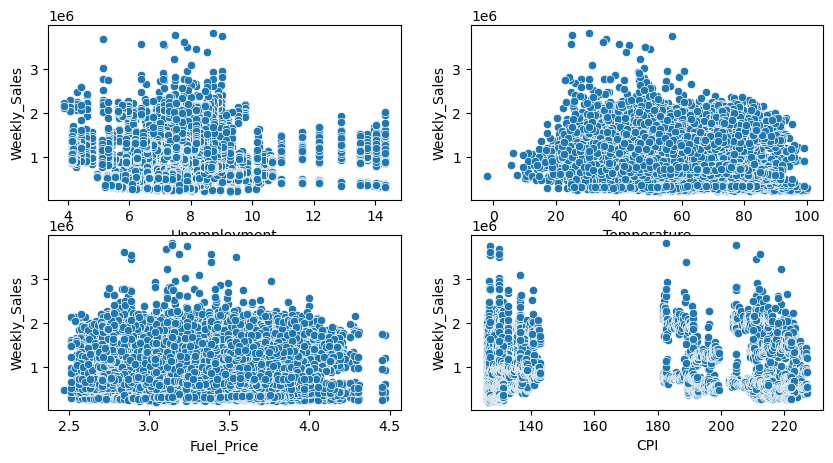

In [142]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.scatterplot(x=sales['Unemployment'],y=sales['Weekly_Sales'],data=sales)
plt.subplot(2,2,2)
sns.scatterplot(x=sales['Temperature'],y=sales['Weekly_Sales'],data=sales)
plt.subplot(2,2,3)
sns.scatterplot(x=sales['Fuel_Price'],y=sales['Weekly_Sales'],data=sales)
plt.subplot(2,2,4)
sns.scatterplot(x=sales['CPI'],y=sales['Weekly_Sales'],data=sales)






In [143]:
sales_corr = sales.corr()
sales_corr

Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.335332 -4.386841e-16    -0.022659   
Weekly_Sales -3.353320e-01      1.000000  3.689097e-02    -0.063810   
Holiday_Flag -4.386841e-16      0.036891  1.000000e+00    -0.155091   
Temperature  -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
Fuel_Price    6.002295e-02      0.009464 -7.834652e-02     0.144982   
CPI          -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
Unemployment  2.235313e-01     -0.106176  1.096028e-02     0.101158   

              Fuel_Price       CPI  Unemployment  
Store           0.060023 -0.209492      0.223531  
Weekly_Sales    0.009464 -0.072634     -0.106176  
Holiday_Flag   -0.078347 -0.002162      0.010960  
Temperature     0.144982  0.176888      0.101158  
Fuel_Price      1.000000 -0.170642     -0.034684  
CPI            -0.170642  1.000000     -0.302020  
Unemployment   -0.034684 -0.302020      1.000000

<AxesSubplot:>

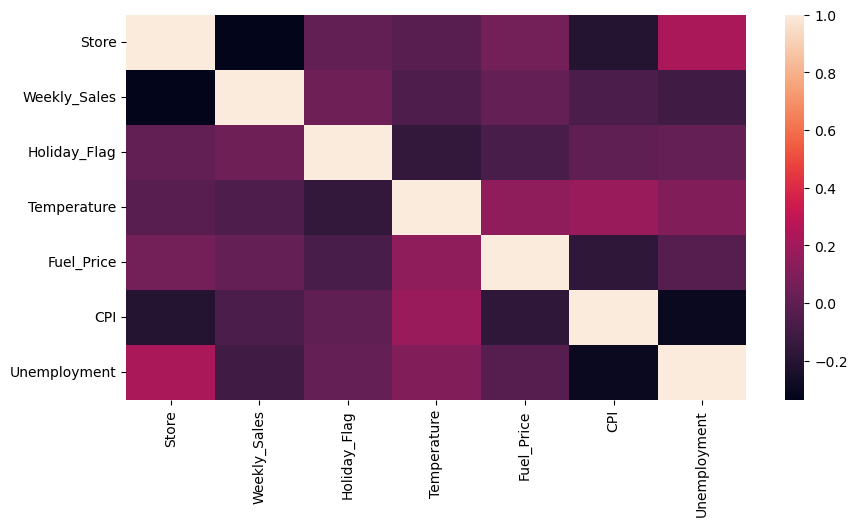

In [144]:
plt.figure(figsize=(10,5))
sns.heatmap(sales_corr)

In [145]:
week_sales=sales.sort_values(by='Weekly_Sales',ascending=False)
week_sales

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1905     14 2010-12-24    3818686.45             0        30.59       3.141   
2763     20 2010-12-24    3766687.43             0        25.17       3.141   
1333     10 2010-12-24    3749057.69             0        57.06       3.236   
527       4 2011-12-23    3676388.98             0        35.92       3.103   
1762     13 2010-12-24    3595903.20             0        34.90       2.846   
...     ...        ...           ...           ...          ...         ...   
4671     33 2011-12-02     220060.35             0        59.12       3.701   
4623     33 2010-12-31     219804.85             1        52.91       3.148   
4675     33 2011-12-30     215359.21             1        51.60       3.428   
4614     33 2010-10-29     213538.32             0        71.34       3.130   
4619     33 2010-12-03     209986.25             0        52.82       3.041   

             CPI  Unemployment  
1905  182.544590         8.724  
2763  204.637673         7.484  
1333  126.983581         9.003  
527   129.984548         5.143  
1762  126.983581         7.795  
...          ...           ...  
4671  129.845967         8.010  
4623  127.087677         9.265  
4675  130.071032         8.010  
4614  126.436419         9.265  
4619  126.731333         9.265  

[6435 rows x 8 columns]

In [146]:
unemp_rate=sales.sort_values(by='Unemployment',ascending=False)
unemp_rate

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
3899     28 2010-10-29    1231688.48             0        61.09       3.016   
5338     38 2010-12-31     303908.81             1        45.64       3.148   
5336     38 2010-12-17     334441.15             0        52.77       3.236   
5335     38 2010-12-10     355965.23             0        50.01       3.203   
5334     38 2010-12-03     351925.36             0        43.33       3.041   
...     ...        ...           ...           ...          ...         ...   
562       4 2012-08-24    2125241.68             0        75.76       3.610   
568       4 2012-10-05    2209835.43             0        63.07       3.620   
569       4 2012-10-12    2133026.07             0        57.11       3.603   
570       4 2012-10-19    2097266.85             0        64.46       3.610   
571       4 2012-10-26    2149594.46             0        63.64       3.514   

             CPI  Unemployment  
3899  126.436419        14.313  
5338  127.087677        14.313  
5336  126.879484        14.313  
5335  126.793400        14.313  
5334  126.731333        14.313  
...          ...           ...  
562   130.838161         4.077  
568   131.075667         3.879  
569   131.108333         3.879  
570   131.149968         3.879  
571   131.193097         3.879  

[6435 rows x 8 columns]

In [147]:
data=sales[(sales['Weekly_Sales']<310000)&(sales['Unemployment']==14.313)]
data

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
5338     38 2010-12-31     303908.81             1        45.64       3.148   

             CPI  Unemployment  
5338  127.087677        14.313

In [148]:
temp=sales.sort_values(by='Temperature')
temp

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
910       7 2011-02-04     558027.77             0        -2.06       3.011   
3626     26 2011-01-28     817485.14             0         5.54       3.243   
2336     17 2011-01-07    1083071.14             0         6.23       2.891   
959       7 2012-01-13     593875.46             0         7.46       3.077   
5628     40 2011-01-28     775910.43             0         9.51       3.243   
...     ...        ...           ...           ...          ...         ...   
1597     12 2010-07-23     912403.67             0        99.22       3.112   
5315     38 2010-07-23     328336.85             0        99.22       3.112   
4657     33 2011-08-26     237095.82             0        99.66       3.663   
4707     33 2012-08-10     297753.49             0       100.07       3.811   
4599     33 2010-07-16     280937.84             0       100.14       2.971   

             CPI  Unemployment  
910   191.762589         8.818  
3626  133.105968         7.907  
2336  127.191774         6.866  
959   196.733052         8.256  
5628  133.105968         5.114  
...          ...           ...  
1597  126.128355        14.180  
5315  126.128355        14.180  
4657  129.283258         8.442  
4707  130.756161         7.147  
4599  126.149806         9.495  

[6435 rows x 8 columns]

In [149]:
cpi_val=sales.sort_values(by='CPI')
cpi_val

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
4603     33 2010-08-13     265367.51             0        95.57       3.049   
1600     12 2010-08-13     928264.40             0        87.01       3.159   
4746     34 2010-08-13     951208.65             0        76.72       2.698   
3888     28 2010-08-13    1218688.09             0        87.01       3.159   
1743     13 2010-08-13    1877592.55             0        74.93       2.837   
...     ...        ...           ...           ...          ...         ...   
1142      8 2012-10-19     900309.75             0        62.99       3.594   
1143      8 2012-10-26     891671.44             0        64.74       3.506   
1284      9 2012-10-12     558464.80             0        60.09       3.601   
1285      9 2012-10-19     542009.46             0        68.01       3.594   
1286      9 2012-10-26     549731.49             0        69.52       3.506   

             CPI  Unemployment  
4603  126.064000         9.495  
1600  126.064000        14.180  
4746  126.064000         9.816  
3888  126.064000        14.180  
1743  126.064000         7.951  
...          ...           ...  
1142  227.018417         5.124  
1143  227.036936         5.124  
1284  227.169392         4.954  
1285  227.214288         4.954  
1286  227.232807         4.954  

[6435 rows x 8 columns]

In [228]:
# a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?


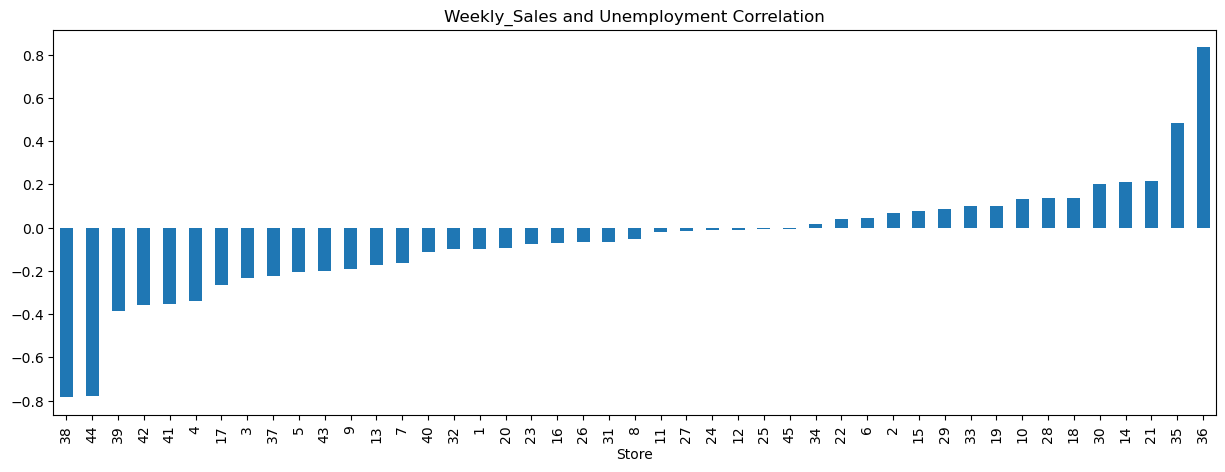

16 stores show +ve correlation:
[34, 22, 6, 2, 15, 29, 33, 19, 10, 28, 18, 30, 14, 21, 35, 36].
29 stores show -ve correlation:
[38, 44, 39, 42, 41, 4, 17, 3, 37, 5, 43, 9, 13, 7, 40, 32, 1, 20, 23, 16, 26, 31, 8, 11, 27, 24, 12, 25, 45].
The 3 most affected stores suffering from increasing unemployment are [38, 44, 39].


In [255]:
diff_store = sales.groupby("Store")
corr_weeksale_unemp = diff_store.apply(lambda group: group["Weekly_Sales"].corr(group["Unemployment"]))
corr_weeksale_unemp_asc = corr_weeksale_unemp.sort_values(ascending=True)
most_affected_stores = [i for i in corr_weeksale_unemp_asc.head(3).index]

fig1a, ax1a = plt.subplots(figsize=(15, 5))
ax1a = corr_weeksale_unemp_asc.plot.bar()
ax1a.set_title("Weekly_Sales and Unemployment Correlation")
plt.show()

print(f'''{len(corr_weeksale_unemp_asc[corr_weeksale_unemp_asc > 0])} stores show +ve correlation:
{[i for i in corr_weeksale_unemp_asc[corr_weeksale_unemp_asc > 0].index]}.
{len(corr_weeksale_unemp_asc[corr_weeksale_unemp_asc < 0])} stores show -ve correlation:
{[i for i in corr_weeksale_unemp_asc[corr_weeksale_unemp_asc < 0].index]}.
The 3 most affected stores suffering from increasing unemployment are {most_affected_stores}.''')


In [152]:
## b. If the weekly sales show a seasonal trend, when and what could be the reason

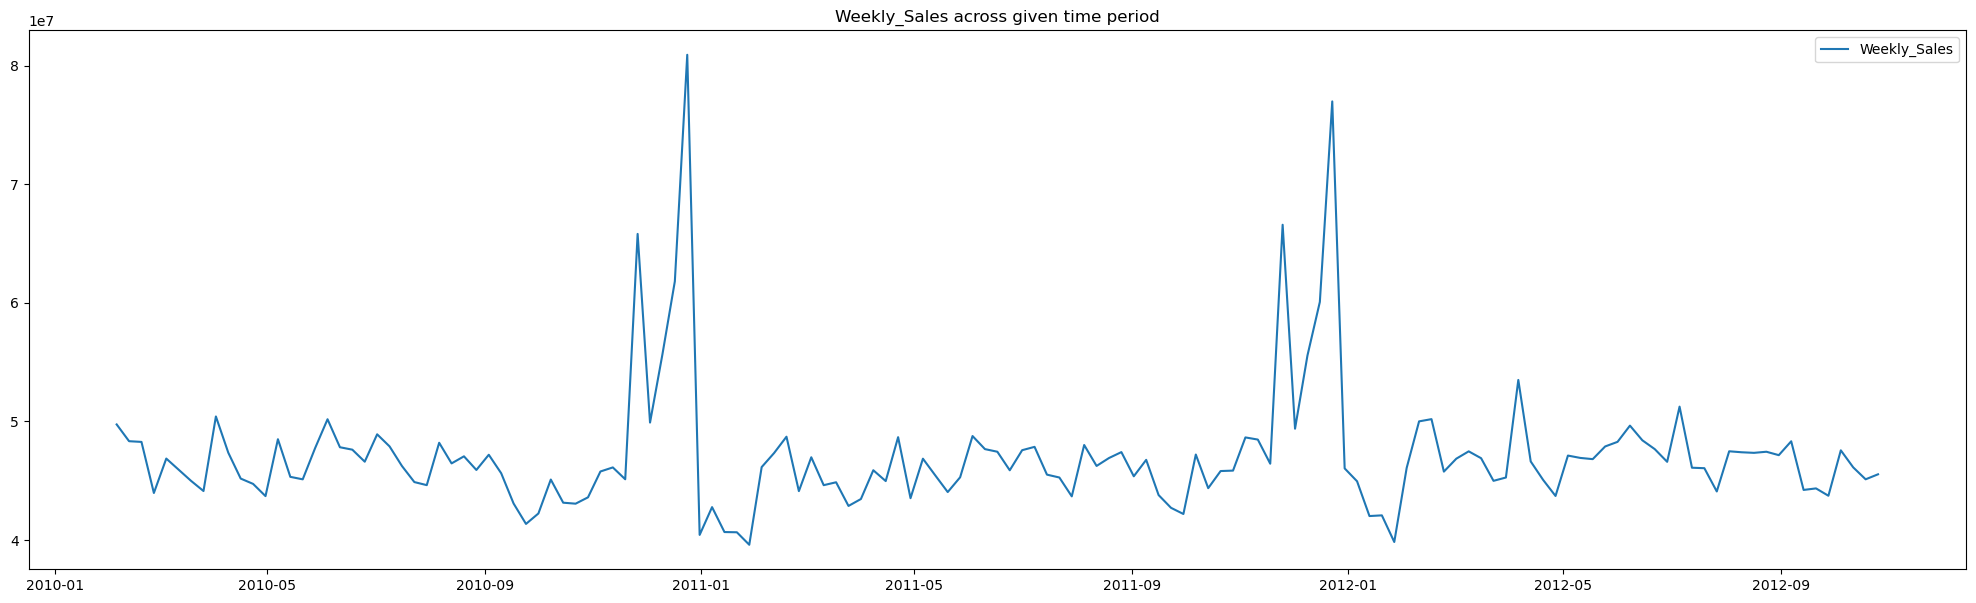

The weekly sales have a seasonal trend as shown in the graph.
Sales rises in the months of Oct, Nov and reaches its peak in Dec, then drops.
The reason can be because of -
Holidays, Black Friday, Haloween, Thanksgiving and Christmas.


In [153]:
diff_date = sales.groupby("Date")
agg_weekly_sales = diff_date.agg(agg_wsales = ("Weekly_Sales", sum))

fig1b, ax1b = plt.subplots(figsize=(25, 7))
ax1b.plot(agg_weekly_sales.index, agg_weekly_sales["agg_wsales"], label="Weekly_Sales")
ax1b.set_title("Weekly_Sales across given time period")
ax1b.legend()
plt.show()

print('''The weekly sales have a seasonal trend as shown in the graph.
Sales rises in the months of Oct, Nov and reaches its peak in Dec, then drops.
The reason can be because of -
Holidays, Black Friday, Haloween, Thanksgiving and Christmas.''')

In [154]:
##c. Does temperature affect the weekly sales in any manner?

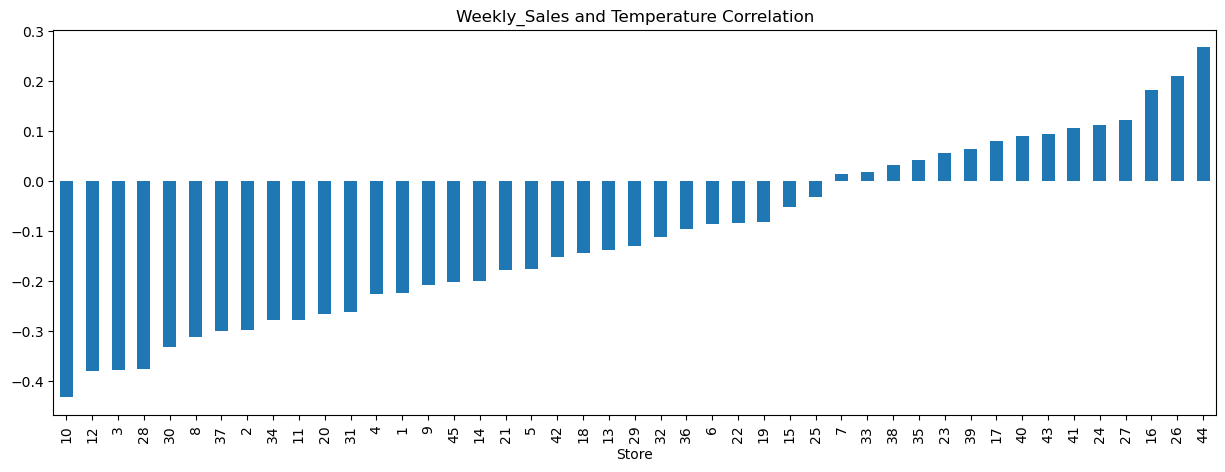

15 stores show +ve correlation:
[7, 33, 38, 35, 23, 39, 17, 40, 43, 41, 24, 27, 16, 26, 44].
30 stores show -ve correlation:
[10, 12, 3, 28, 30, 8, 37, 2, 34, 11, 20, 31, 4, 1, 9, 45, 14, 21, 5, 42, 18, 13, 29, 32, 36, 6, 22, 19, 15, 25].


In [156]:
corr_ws_t = diff_store.apply(lambda group: group["Weekly_Sales"].corr(group["Temperature"]))
corr_ws_t_asc = corr_ws_t.sort_values(ascending=True)

fig1c, ax1c = plt.subplots(figsize=(15,5))
ax1c = corr_ws_t_asc.plot.bar()
ax1c.set_title("Weekly_Sales and Temperature Correlation")
plt.show()

print(f'''{len(corr_ws_t_asc[corr_ws_t_asc > 0])} stores show +ve correlation:
{[i for i in corr_ws_t_asc[corr_ws_t_asc > 0].index]}.
{len(corr_ws_t_asc[corr_ws_t_asc < 0])} stores show -ve correlation:
{[i for i in corr_ws_t_asc[corr_ws_t_asc < 0].index]}.''')

In [ ]:
##d. How is the Consumer Price index affecting the weekly sales of various stores?

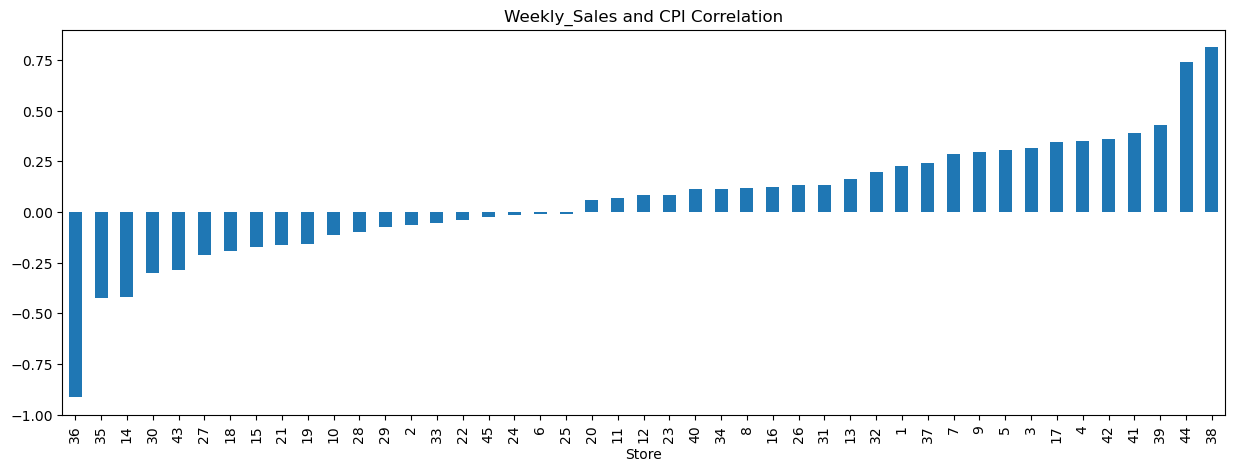

25 stores show +ve correlation:
[20, 11, 12, 23, 40, 34, 8, 16, 26, 31, 13, 32, 1, 37, 7, 9, 5, 3, 17, 4, 42, 41, 39, 44, 38].
20 stores show -ve correlation:
[36, 35, 14, 30, 43, 27, 18, 15, 21, 19, 10, 28, 29, 2, 33, 22, 45, 24, 6, 25].


In [170]:
corr_ws_c = diff_store.apply(lambda group: group["Weekly_Sales"].corr(group["CPI"]))
corr_ws_c_asc = corr_ws_c.sort_values(ascending=True)

fig1d, ax1d = plt.subplots(figsize=(15,5))
ax1d = corr_ws_c_asc.plot.bar()
ax1d.set_title("Weekly_Sales and CPI Correlation")
plt.show()

print(f'''{len(corr_ws_c_asc[corr_ws_c_asc > 0])} stores show +ve correlation:
{[i for i in corr_ws_c_asc[corr_ws_c_asc > 0].index]}.
{len(corr_ws_c_asc[corr_ws_c_asc < 0])} stores show -ve correlation:
{[i for i in corr_ws_c_asc[corr_ws_c_asc < 0].index]}.''')


In [ ]:
##e. Top performing stores according to the historical data.


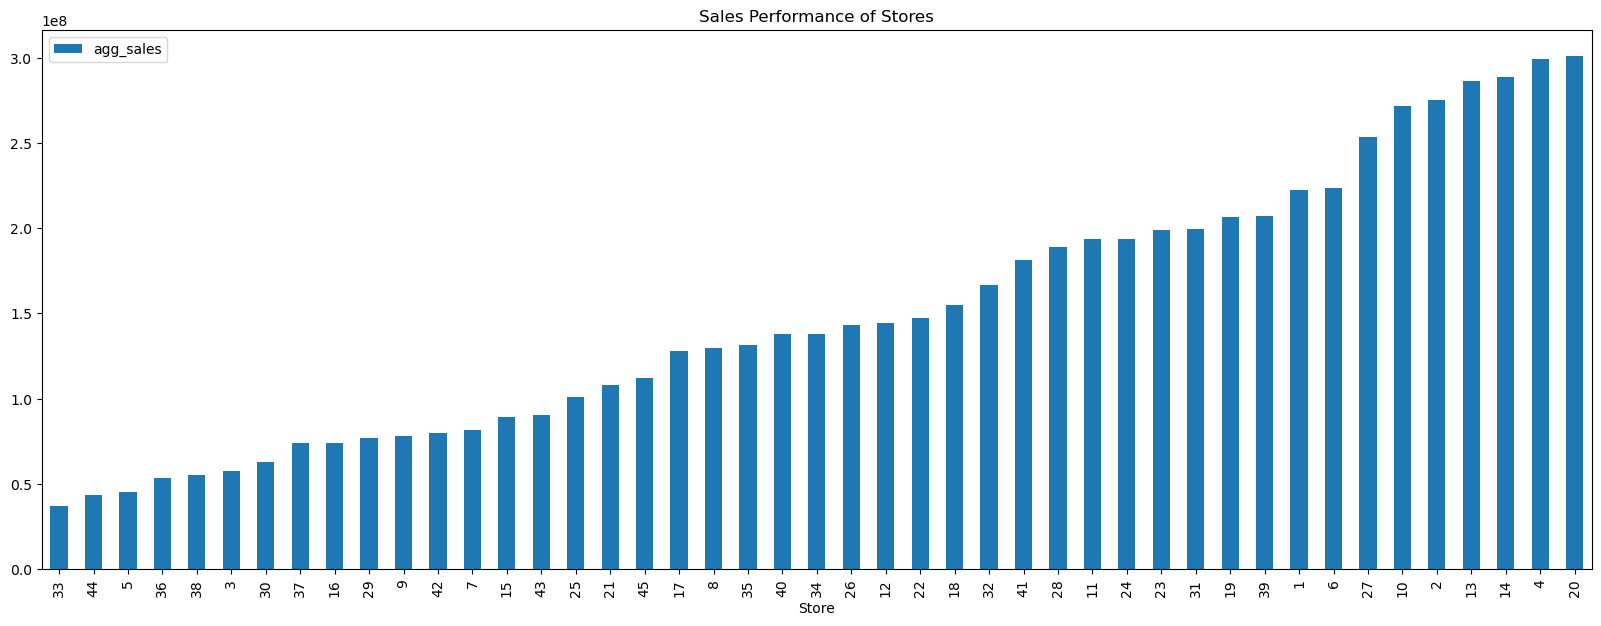

Top 10 performing stores in the decreasing order of performance:
[20, 4, 14, 13, 2, 10, 27, 6, 1, 39]


In [171]:
agg_store_sales = diff_store.agg(agg_sales = ("Weekly_Sales", sum))
agg_store_sales_asc = agg_store_sales.sort_values(by="agg_sales", ascending=True)
top_perf_store = [i for i in agg_store_sales_asc.tail(10).index]

ax1e = agg_store_sales_asc.plot.bar(figsize=(20,7))
ax1e.set_title("Sales Performance of Stores")
plt.show()

print(f'''Top 10 performing stores in the decreasing order of performance:
{top_perf_store[::-1]}''')


In [226]:
##f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.


In [283]:
hps = agg_store_sales_asc.tail(1).index.item()
wps = agg_store_sales_asc.head(1).index.item()
print(f"The worst performing store: Store {wps}.")
diff_hl = round(agg_store_sales_asc["agg_sales"].max() - agg_store_sales_asc["agg_sales"].min())
print(f"Difference between the highest and lowest performing store: {diff_hl}")

hps_sales = sales[sales["Store"] == hps]["Weekly_Sales"]
wps_sales = sales[sales["Store"] == wps]["Weekly_Sales"]
store_sales_means = diff_store["Weekly_Sales"].mean()

print('''Null hypothesis: There is no significant difference between highest and lowest performing stores.
Alternate hypothesis: There is a significant difference between highest and lowest performing stores.''')
t_statistic, p_value = ttest_ind(hps_sales, wps_sales)
print(f'''\nFrom the two sample t-test,
Statistic: {t_statistic},
P-Value: {p_value}\n''')
if p_value < 0.05:
	print('''P-value < 0.05, we reject the null hypothesis.
	Therefore there is a significant difference between the highest and lowest performing stores''')
else:
	print('''P-value > 0.05, we failed to reject the null hypothesis.
	Therefore there is no significant difference between the highest and lowest performing stores''')

The worst performing store: Store 33.
Difference between the highest and lowest performing store: 264237570
Null hypothesis: There is no significant difference between highest and lowest performing stores.
Alternate hypothesis: There is a significant difference between highest and lowest performing stores.

From the two sample t-test,
Statistic: 79.7845693614103,
P-Value: 1.6548468656243e-196

P-value < 0.05, we reject the null hypothesis.
	Therefore there is a significant difference between the highest and lowest performing stores


In [ ]:
#2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

<AxesSubplot:>

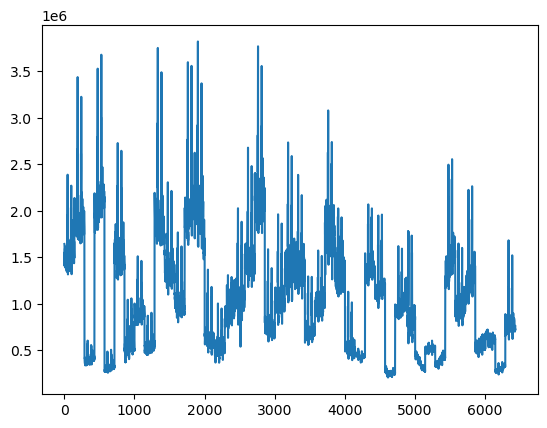

In [174]:
sales['Weekly_Sales'].plot()

<AxesSubplot:>

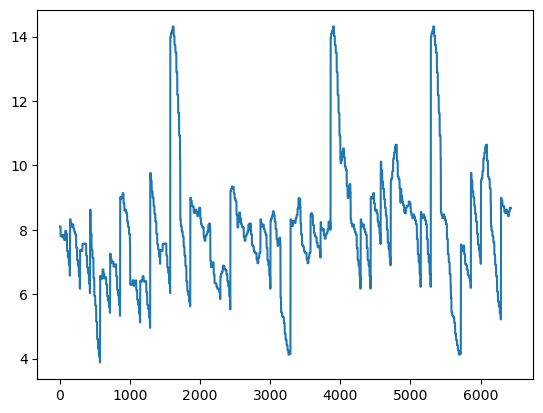

In [175]:
sales['Unemployment'].plot()

<AxesSubplot:>

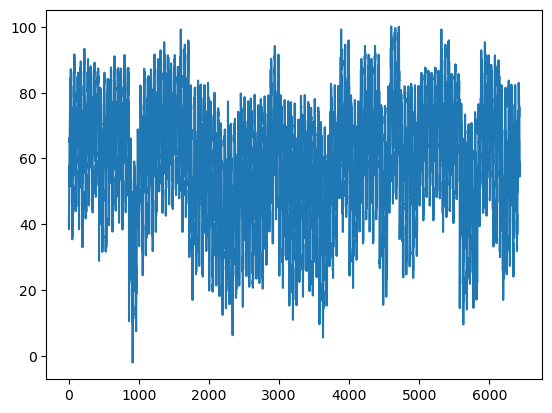

In [176]:
sales['Temperature'].plot()

In [197]:
from sklearn.model_selection import train_test_split

In [230]:
X = sales['Unemployment']
y = sales['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [231]:
X_train_2d = X_train.values.reshape(-1, 1)
X_test_2d = X_test.values.reshape(-1, 1)
y_train_2d = y_train.values.reshape(-1, 1)
y_test_2d = y_test.values.reshape(-1, 1)

In [232]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_2d = sc.fit_transform(X_train_2d)
X_test_2d = sc.transform(X_test_2d)

In [233]:
from sklearn.linear_model import LinearRegression
lModel=LinearRegression()
lModel.fit(X_train_2d, y_train_2d)

LinearRegression()

In [234]:
pred=lModel.predict(X_test_2d)

In [235]:
pred

array([[1004082.09606057],
       [1037688.84051604],
       [1063861.36574347],
       ...,
       [1011210.79942991],
       [1038096.19499428],
       [1083380.43449286]])

In [236]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_2d, pred)

In [237]:
r2

0.00500061501699689

In [238]:
from sklearn.metrics import *

In [239]:
rmse_on_test = mean_squared_error(y_test_2d, pred, squared=False)

In [240]:
print("rmse for model 1 on test is:{}".format(rmse_on_test))

rmse for model 1 on test is:566165.6945453617


In [241]:
mape_on_test = mean_absolute_percentage_error(y_test_2d, pred)

In [242]:
print("mean absolute percentage error for model 1 on test: {}".format(mape_on_test))

mean absolute percentage error for model 1 on test: 0.6816154775677142


In [245]:
sales.index=sales['Date']

In [246]:
sales

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  \
Date                                                                    
2010-02-05      1 2010-02-05    1643690.90             0        42.31   
2010-02-12      1 2010-02-12    1641957.44             1        38.51   
2010-02-19      1 2010-02-19    1611968.17             0        39.93   
2010-02-26      1 2010-02-26    1409727.59             0        46.63   
2010-03-05      1 2010-03-05    1554806.68             0        46.50   
...           ...        ...           ...           ...          ...   
2012-09-28     45 2012-09-28     713173.95             0        64.88   
2012-10-05     45 2012-10-05     733455.07             0        64.89   
2012-10-12     45 2012-10-12     734464.36             0        54.47   
2012-10-19     45 2012-10-19     718125.53             0        56.47   
2012-10-26     45 2012-10-26     760281.43             0        58.85   

            Fuel_Price         CPI  Unemployment  
Date                                              
2010-02-05       2.572  211.096358         8.106  
2010-02-12       2.548  211.242170         8.106  
2010-02-19       2.514  211.289143         8.106  
2010-02-26       2.561  211.319643         8.106  
2010-03-05       2.625  211.350143         8.106  
...                ...         ...           ...  
2012-09-28       3.997  192.013558         8.684  
2012-10-05       3.985  192.170412         8.667  
2012-10-12       4.000  192.327265         8.667  
2012-10-19       3.969  192.330854         8.667  
2012-10-26       3.882  192.308899         8.667  

[6435 rows x 8 columns]

In [247]:
del sales["Date"]

In [265]:
sales.head(20)

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   
2010-03-12      1    1439541.59             0        57.79       2.667   
2010-03-19      1    1472515.79             0        54.58       2.720   
2010-03-26      1    1404429.92             0        51.45       2.732   
2010-04-02      1    1594968.28             0        62.27       2.719   
2010-04-09      1    1545418.53             0        65.86       2.770   
2010-04-16      1    1466058.28             0        66.32       2.808   
2010-04-23      1    1391256.12             0        64.84       2.795   
2010-04-30      1    1425100.71             0        67.41       2.780   
2010-05-07      1    1603955.12             0        72.55       2.835   
2010-05-14      1    1494251.50             0        74.78       2.854   
2010-05-21      1    1399662.07             0        76.44       2.826   
2010-05-28      1    1432069.95             0        80.44       2.759   
2010-06-04      1    1615524.71             0        80.69       2.705   
2010-06-11      1    1542561.09             0        80.43       2.668   
2010-06-18      1    1503284.06             0        84.11       2.637   

                   CPI  Unemployment  
Date                                  
2010-02-05  211.096358         8.106  
2010-02-12  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-03-05  211.350143         8.106  
2010-03-12  211.380643         8.106  
2010-03-19  211.215635         8.106  
2010-03-26  211.018042         8.106  
2010-04-02  210.820450         7.808  
2010-04-09  210.622857         7.808  
2010-04-16  210.488700         7.808  
2010-04-23  210.439123         7.808  
2010-04-30  210.389546         7.808  
2010-05-07  210.339968         7.808  
2010-05-14  210.337426         7.808  
2010-05-21  210.617093         7.808  
2010-05-28  210.896761         7.808  
2010-06-04  211.176428         7.808  
2010-06-11  211.456095         7.808  
2010-06-18  211.453772         7.808

<AxesSubplot:xlabel='Date'>

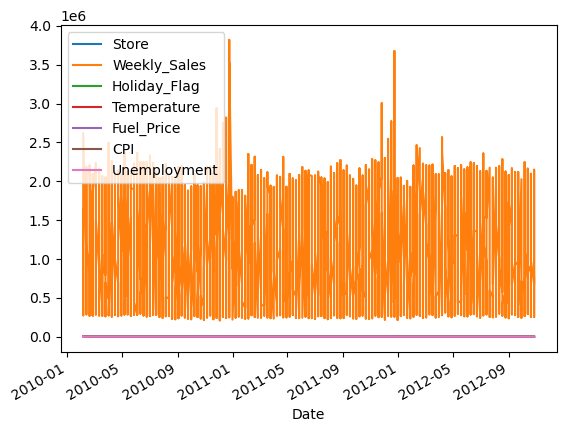

In [266]:
sales.plot()

In [262]:
sales_store=sales.groupby("Store")['Weekly_Sales'].sum()


In [263]:
sales_store

Store
1     2.224028e+08
2     2.753824e+08
3     5.758674e+07
4     2.995440e+08
5     4.547569e+07
6     2.237561e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.716177e+08
11    1.939628e+08
12    1.442872e+08
13    2.865177e+08
14    2.889999e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    3.013978e+08
21    1.081179e+08
22    1.470756e+08
23    1.987506e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.538559e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    1.668192e+08
33    3.716022e+07
34    1.382498e+08
35    1.315207e+08
36    5.341221e+07
37    7.420274e+07
38    5.515963e+07
39    2.074455e+08
40    1.378703e+08
41    1.813419e+08
42    7.956575e+07
43    9.056544e+07
44    4.329309e+07
45    1.123953e+08
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Store'>

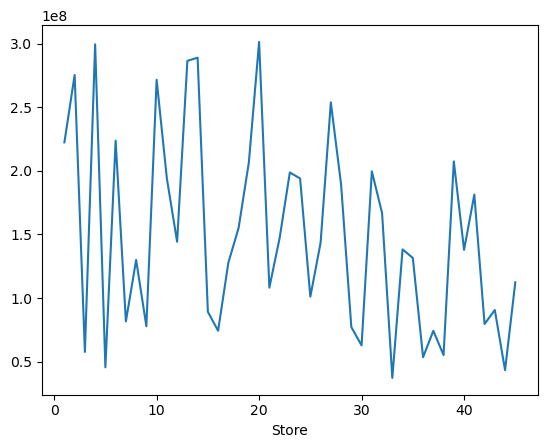

In [264]:
sales_store.plot()

In [256]:
from statsmodels.tsa.stattools import adfuller

In [258]:
result= adfuller(sales['Weekly_Sales']);
result

(-4.624149498578299,
 0.00011655869699901492,
 34,
 6400,
 {'1%': -3.4313721757424656,
  '5%': -2.8619917128968813,
  '10%': -2.5670104435791017},
 171522.33418043077)

In [259]:
r=pd.Series(result[0:3],index=['Test Stats','p-value','number of observations used'])
r

Test Stats                     -4.624149
p-value                         0.000117
number of observations used    34.000000
dtype: float64

In [268]:
rolling_mean=sales.rolling(window=4).mean()
rolling_mean

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05    NaN           NaN           NaN          NaN         NaN   
2010-02-12    NaN           NaN           NaN          NaN         NaN   
2010-02-19    NaN           NaN           NaN          NaN         NaN   
2010-02-26    1.0  1.576836e+06          0.25      41.8450     2.54875   
2010-03-05    1.0  1.554615e+06          0.25      42.8925     2.56200   
...           ...           ...           ...          ...         ...   
2012-09-28   45.0  7.262528e+05          0.25      68.4425     3.97350   
2012-10-05   45.0  7.179884e+05          0.00      65.7400     3.99200   
2012-10-12   45.0  7.260449e+05          0.00      62.3900     4.00500   
2012-10-19   45.0  7.248047e+05          0.00      60.1775     3.98775   
2012-10-26   45.0  7.365816e+05          0.00      58.6700     3.95900   

                   CPI  Unemployment  
Date                                  
2010-02-05         NaN           NaN  
2010-02-12         NaN           NaN  
2010-02-19         NaN           NaN  
2010-02-26  211.236828       8.10600  
2010-03-05  211.300275       8.10600  
...                ...           ...  
2012-09-28  191.786947       8.68400  
2012-10-05  191.935131       8.67975  
2012-10-12  192.091985       8.67550  
2012-10-19  192.210522       8.67125  
2012-10-26  192.284357       8.66700  

[6435 rows x 7 columns]

In [269]:
rolling_mean.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6432 non-null   float64
 1   Weekly_Sales  6432 non-null   float64
 2   Holiday_Flag  6432 non-null   float64
 3   Temperature   6432 non-null   float64
 4   Fuel_Price    6432 non-null   float64
 5   CPI           6432 non-null   float64
 6   Unemployment  6432 non-null   float64
dtypes: float64(7)
memory usage: 402.2 KB


In [272]:
rolling_mean_detrended=sales-rolling_mean
rolling_mean_detrended[:5]

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05    NaN           NaN           NaN          NaN         NaN   
2010-02-12    NaN           NaN           NaN          NaN         NaN   
2010-02-19    NaN           NaN           NaN          NaN         NaN   
2010-02-26    0.0   -167108.435         -0.25       4.7850     0.01225   
2010-03-05    0.0       191.710         -0.25       3.6075     0.06300   

                 CPI  Unemployment  
Date                                
2010-02-05       NaN           NaN  
2010-02-12       NaN           NaN  
2010-02-19       NaN           NaN  
2010-02-26  0.082814           0.0  
2010-03-05  0.049868           0.0

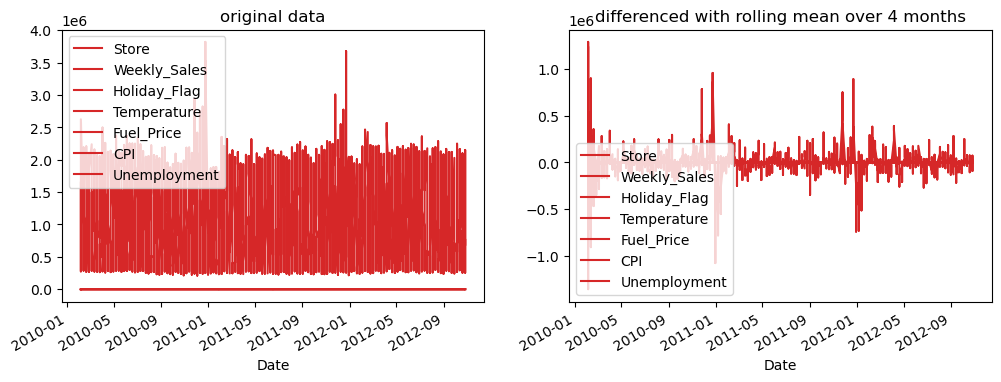

In [273]:
ax1=plt.subplot(1,2,2)   #subplot(width,height,location), this can be written also as subplot(122)
rolling_mean_detrended.plot(figsize=(12,4),color='tab:red',
                            title='differenced with rolling mean over 4 months',
                            ax=ax1)

ax2=plt.subplot(1,2,1)
sales.plot(figsize=(12,4),
          color='tab:red',
          title="original data",
          ax=ax2)

plt.show()

In [274]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [292]:
decompose_result=seasonal_decompose(sales["Weekly_Sales"],period=52)

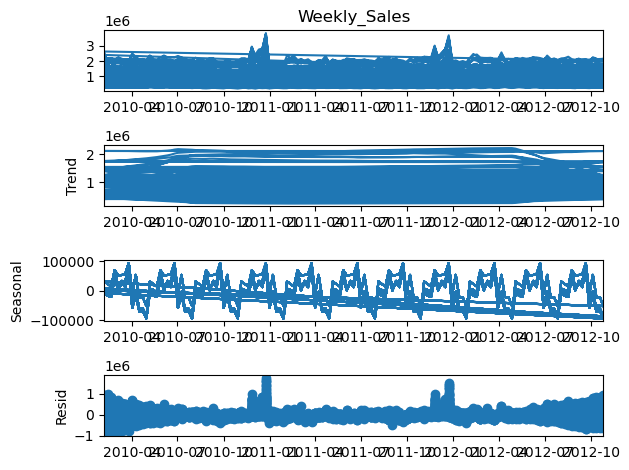

In [293]:
decompose_result.plot();

In [294]:
rolling_mean_detrended[:5]

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05    NaN           NaN           NaN          NaN         NaN   
2010-02-12    NaN           NaN           NaN          NaN         NaN   
2010-02-19    NaN           NaN           NaN          NaN         NaN   
2010-02-26    0.0   -167108.435         -0.25       4.7850     0.01225   
2010-03-05    0.0       191.710         -0.25       3.6075     0.06300   

                 CPI  Unemployment  
Date                                
2010-02-05       NaN           NaN  
2010-02-12       NaN           NaN  
2010-02-19       NaN           NaN  
2010-02-26  0.082814           0.0  
2010-03-05  0.049868           0.0

In [295]:
rolling_mean_detrended.shift()[:5]

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05    NaN           NaN           NaN          NaN         NaN   
2010-02-12    NaN           NaN           NaN          NaN         NaN   
2010-02-19    NaN           NaN           NaN          NaN         NaN   
2010-02-26    NaN           NaN           NaN          NaN         NaN   
2010-03-05    0.0   -167108.435         -0.25        4.785     0.01225   

                 CPI  Unemployment  
Date                                
2010-02-05       NaN           NaN  
2010-02-12       NaN           NaN  
2010-02-19       NaN           NaN  
2010-02-26       NaN           NaN  
2010-03-05  0.082814           0.0

In [296]:
rolling_mean_detrended_diff=rolling_mean_detrended-rolling_mean_detrended.shift()

In [298]:
rolling_mean_detrended_diff[:5]

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05    NaN           NaN           NaN          NaN         NaN   
2010-02-12    NaN           NaN           NaN          NaN         NaN   
2010-02-19    NaN           NaN           NaN          NaN         NaN   
2010-02-26    NaN           NaN           NaN          NaN         NaN   
2010-03-05    0.0    167300.145           0.0      -1.1775     0.05075   

                 CPI  Unemployment  
Date                                
2010-02-05       NaN           NaN  
2010-02-12       NaN           NaN  
2010-02-19       NaN           NaN  
2010-02-26       NaN           NaN  
2010-03-05 -0.032946           0.0

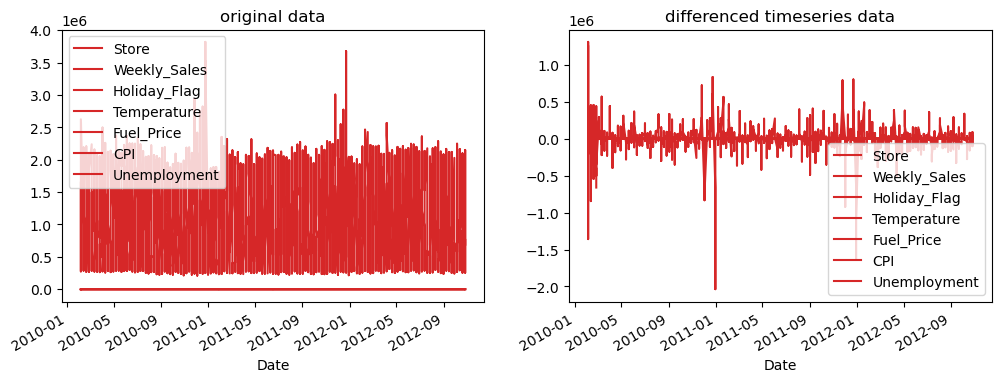

In [299]:
ax1=plt.subplot(1,2,2)
rolling_mean_detrended_diff.plot(figsize=(12,4),color='tab:red',
                            title='differenced timeseries data',
                            ax=ax1)

ax2=plt.subplot(1,2,1)
sales.plot(figsize=(12,4),
          color='tab:red',
          title="original data",
          ax=ax2)

plt.show()

In [300]:
#dropping null values
rolling_mean_detrended_diff=rolling_mean_detrended_diff.dropna()
rolling_mean_detrended_diff

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-03-05    0.0   167300.1450          0.00      -1.1775     0.05075   
2010-03-12    0.0   -64661.1275          0.25       6.4700     0.01225   
2010-03-19    0.0    67837.2950          0.00      -6.8725     0.00150   
2010-03-26    0.0   -66761.4525          0.00      -4.3350    -0.03075   
2010-04-02    0.0   180497.9600          0.00       6.8775    -0.03650   
...           ...           ...           ...          ...         ...   
2012-09-28    0.0    -4631.2700          0.00       2.1125    -0.07350   
2012-10-05    0.0    28545.5175          0.25       2.7125    -0.03050   
2012-10-12    0.0    -7047.2325          0.00      -7.0700     0.00200   
2012-10-19    0.0   -15098.6625          0.00       4.2125    -0.01375   
2012-10-26    0.0    30379.0300          0.00       3.8875    -0.05825   

                     CPI  Unemployment  
Date                                    
2010-03-05 -3.294617e-02       0.00000  
2010-03-12 -4.118275e-03       0.00000  
2010-03-19 -1.466309e-01       0.00000  
2010-03-26 -1.221925e-01       0.00000  
2010-04-02 -6.516925e-02      -0.22350  
...                  ...           ...  
2012-09-28  1.878473e-02       0.00000  
2012-10-05  8.669825e-03      -0.01275  
2012-10-12  4.999998e-08       0.00425  
2012-10-19 -1.149488e-01       0.00425  
2012-10-26 -9.579060e-02       0.00425  

[6431 rows x 7 columns]

In [302]:
result=adfuller(rolling_mean_detrended_diff['Weekly_Sales'])
pvalue=result[1]
pvalue

0.0

In [303]:
if pvalue<0.05:
  print('we accept null hypothesis- data is stationary')

else:
  print('we reject null hypothesis - data is not stationary')

we accept null hypothesis- data is stationary


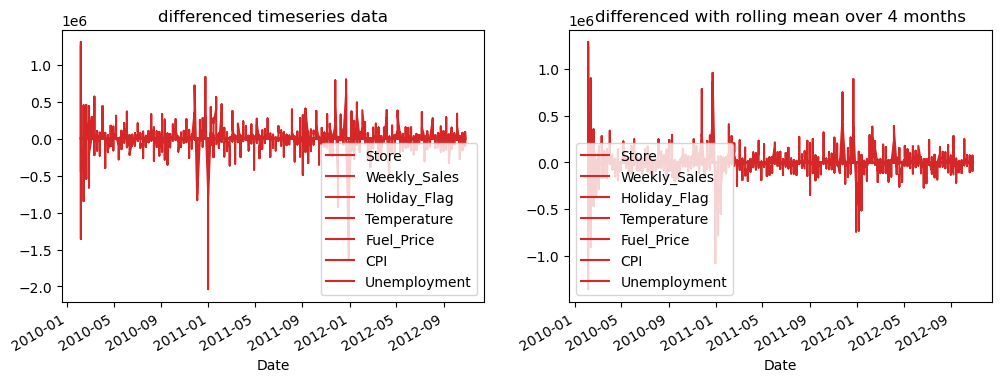

In [308]:
ax1=plt.subplot(1,2,2)
rolling_mean_detrended.plot(figsize=(12,4),color='tab:red',
                            title='differenced with rolling mean over 4 months',
                            ax=ax1)

ax2=plt.subplot(1,2,1)
rolling_mean_detrended_diff.plot(figsize=(12,4),color='tab:red',
                            title='differenced timeseries data',
                            ax=ax2)
plt.legend(loc='best')

In [310]:
m=rolling_mean_detrended_diff.rolling(window=4).mean()
m

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-03-05    NaN           NaN           NaN          NaN         NaN   
2010-03-12    NaN           NaN           NaN          NaN         NaN   
2010-03-19    NaN           NaN           NaN          NaN         NaN   
2010-03-26    0.0  25928.715000        0.0625    -1.478750    0.008438   
2010-04-02    0.0  29228.168750        0.0625     0.535000   -0.013375   
...           ...           ...           ...          ...         ...   
2012-09-28    0.0  -5090.148750       -0.0625    -0.783750   -0.009000   
2012-10-05    0.0  -3915.258125       -0.1875    -0.442500   -0.015813   
2012-10-12    0.0   9125.365000        0.0625    -0.742500   -0.015750   
2012-10-19    0.0    442.088125        0.0625     0.491875   -0.028938   
2012-10-26    0.0   9194.663125        0.0625     0.935625   -0.025125   

                 CPI  Unemployment  
Date                                
2010-03-05       NaN           NaN  
2010-03-12       NaN           NaN  
2010-03-19       NaN           NaN  
2010-03-26 -0.076472      0.000000  
2010-04-02 -0.084528     -0.055875  
...              ...           ...  
2012-09-28  0.016162      0.000000  
2012-10-05  0.015172     -0.003187  
2012-10-12  0.014089     -0.002125  
2012-10-19 -0.021874     -0.001062  
2012-10-26 -0.050517      0.000000  

[6431 rows x 7 columns]

In [311]:
s=rolling_mean_detrended_diff.rolling(window=4).std()
s

Store   Weekly_Sales  Holiday_Flag  Temperature  \
Date                                                                 
2010-03-05           NaN            NaN           NaN          NaN   
2010-03-12           NaN            NaN           NaN          NaN   
2010-03-19           NaN            NaN           NaN          NaN   
2010-03-26  0.000000e+00  113343.426531      0.125000     5.788612   
2010-04-02  0.000000e+00  118887.091692      0.125000     7.165647   
...                  ...            ...           ...          ...   
2012-09-28  1.520843e-09   38200.099212      0.718070     3.596474   
2012-10-05  1.520843e-09   39438.903008      0.554339     3.916615   
2012-10-12  1.520843e-09   17685.973746      0.125000     4.476815   
2012-10-19  1.520843e-09   19262.628401      0.125000     5.118027   
2012-10-26  1.520843e-09   23644.575194      0.125000     5.375835   

            Fuel_Price       CPI  Unemployment  
Date                                            
2010-03-05         NaN       NaN           NaN  
2010-03-12         NaN       NaN           NaN  
2010-03-19         NaN       NaN           NaN  
2010-03-26    0.033609  0.068659  0.000000e+00  
2010-04-02    0.023907  0.063550  1.117500e-01  
...                ...       ...           ...  
2012-09-28    0.046950  0.010352  7.475713e-08  
2012-10-05    0.047807  0.010973  6.375000e-03  
2012-10-12    0.047837  0.012507  7.361216e-03  
2012-10-19    0.032537  0.062523  8.045120e-03  
2012-10-26    0.025764  0.063917  8.500000e-03  

[6431 rows x 7 columns]

Text(0.5, 1.0, 'rolling_mean_detrended_diff with mean and std')

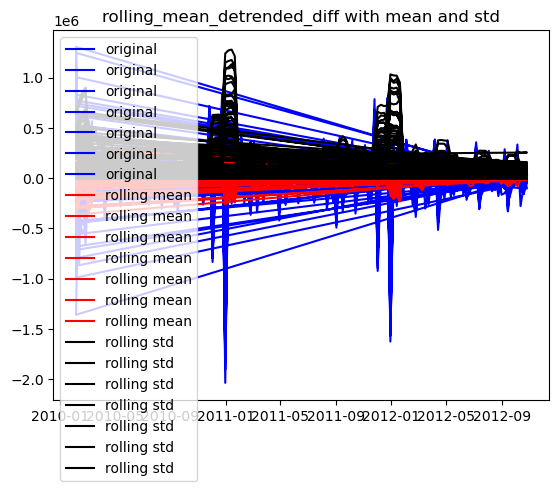

In [312]:
plt.plot(rolling_mean_detrended_diff,color='blue',label='original')
plt.plot(m,color='red',label='rolling mean')
plt.plot(s,color='black',label='rolling std')
plt.legend(loc='best') #placing the legend(labels) at the appropriate best location so that the graph will be properly visible
plt.title('rolling_mean_detrended_diff with mean and std')

In [313]:
#installing arima to find the best model
!pip install pmdarima

In [314]:
from pmdarima import auto_arima

In [315]:
order=auto_arima(rolling_mean_detrended_diff['Weekly_Sales'])

In [316]:
#Finding the best order of arima
order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6431
Model:               SARIMAX(5, 0, 0)   Log Likelihood              -85235.459
Date:                Mon, 21 Aug 2023   AIC                         170482.919
Time:                        14:27:33   BIC                         170523.532
Sample:                             0   HQIC                        170496.973
                               - 6431                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4708      0.006    -73.796      0.000      -0.483      -0.458
ar.L2         -0.4310      0.012    -36.713      0.000      -0.454      -0.408
ar.L3         -0.4762      0.009    -50.722      0.000      -0.495      -0.458
ar.L4         -0.0274      0.008     -3.474      0.001      -0.043      -0.012
ar.L5         -0.2094      0.009    -22.103      0.000      -0.228      -0.191
sigma2      1.905e+10   6.37e-13   2.99e+22      0.000     1.9e+10     1.9e+10
===================================================================================
Ljung-Box (L1) (Q):                  22.59   Jarque-Bera (JB):            113694.76
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                            -1.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.47e+37. Standard errors may be unstable.
"""

In [317]:
#importing required library
from statsmodels.tsa.arima.model import ARIMA

In [318]:
#test and train data
train=rolling_mean_detrended_diff.iloc[:120]['Weekly_Sales']
test=rolling_mean_detrended_diff.iloc[120:]['Weekly_Sales']

In [319]:
#next is building model with the order (5, 0, 0)	
model=ARIMA(train,order=(5,0,0))
model_fit=model.fit()

C:\Users\dituj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\dituj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\dituj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [320]:
rolling_mean_detrended_diff['predict']=model_fit.predict(start=len(train),
                                                         end=len(train)+len(test)-1,dynamic=True)

C:\Users\dituj\AppData\Local\Temp\ipykernel_14704\716315280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_mean_detrended_diff['predict']=model_fit.predict(start=len(train),


<AxesSubplot:xlabel='Date'>

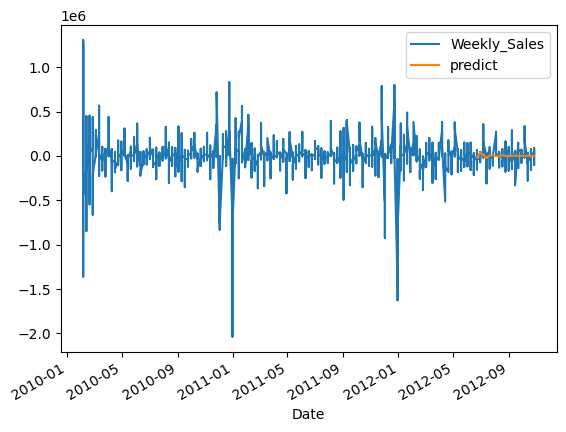

In [321]:
rolling_mean_detrended_diff[['Weekly_Sales','predict']].plot()

In [322]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

In [331]:
model=SARIMAX(train,order=(5,0,0),seasonal_order=(5,0,0,52))
model=model.fit()

C:\Users\dituj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\dituj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\dituj\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [332]:
rolling_mean_detrended_diff['predict']=model.predict(start=len(train),
                                                         end=len(train)+len(test)-1,dynamic=True)

C:\Users\dituj\AppData\Local\Temp\ipykernel_14704\265251919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_mean_detrended_diff['predict']=model.predict(start=len(train),


<AxesSubplot:xlabel='Date'>

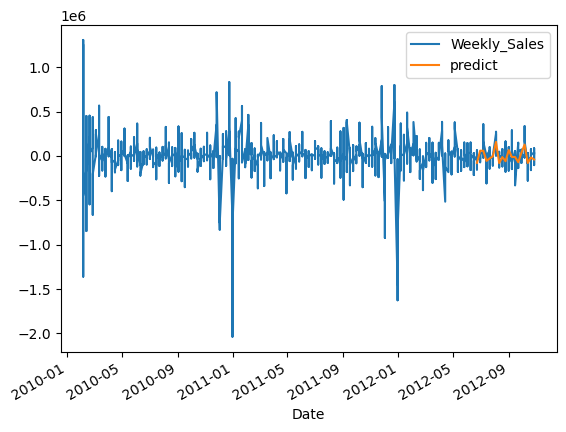

In [334]:
rolling_mean_detrended_diff[['Weekly_Sales','predict']].plot()

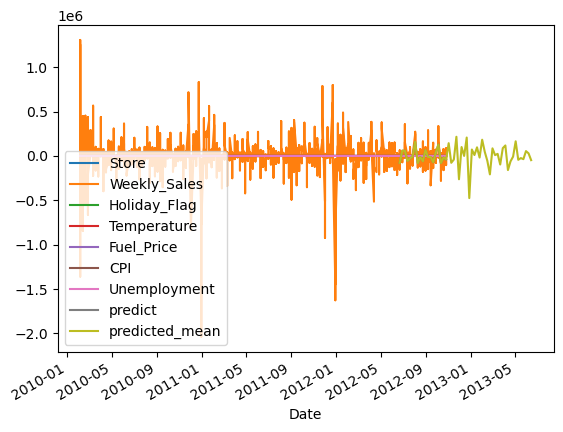

In [351]:
#forecasting the data
forecast = model.forecast(steps=52)
rolling_mean_detrended_diff.plot()
forecast.plot()
plt.legend(loc='lower left')